# 탐색적 데이터 분석(EDA)

In [1]:
import pandas as pd

In [3]:
test = pd.read_csv('../input/test.csv')
train = pd.read_csv('../input/train.csv')

In [9]:
# 병합 준비
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train['Survived'].values
passenger_id = test['PassengerId']

# 병합
data = pd.concat((train, test))

## 파일 탐색

### missingno

- 결측치 시각화

- missingno를 사용하면 빈 값 데이터를 쉽게 시각화 할 수 있다.

- missingno.matrix()

    - 행렬 형식으로 빈값 데이터를 시각화하는 명령어

    - 빈값 데이터는 희색으로 표현된다.

    - 가장 오른쪽에 있는것은 **스파크 라인** 이라고 한다. 각 행의 데이터의 완전성을 나타낸다.

In [25]:
import missingno as msno

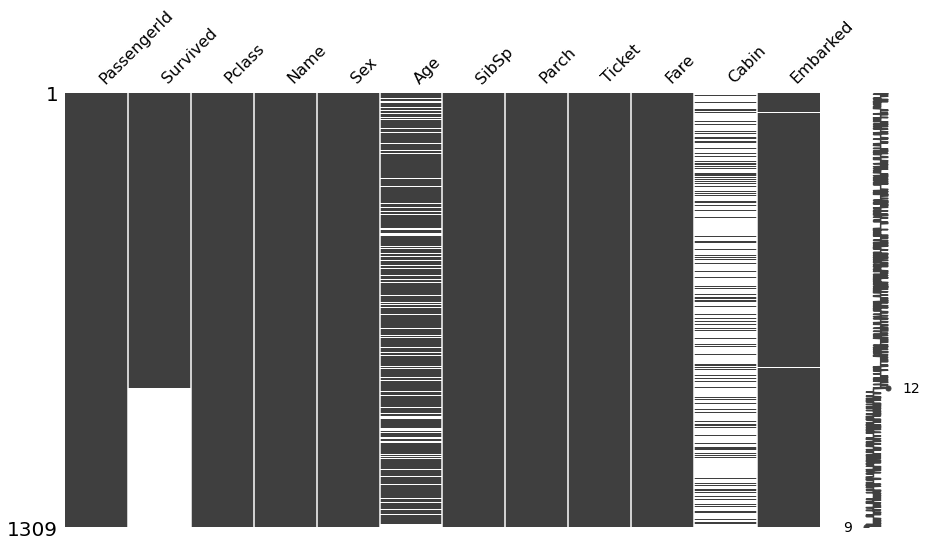

In [19]:
msno.matrix(data, figsize=(15, 8))

- Survived에서 비어있는 것은 우리가 예측 해야할 부분

In [24]:
# 비어있는 값 확인
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

- NaN 값은 pandas가 numpy 위에서 움직이기 때문에 가져온 numpy의 기능이다.

### 상관관계

- Co-relation 매트릭스는 seaborn에서 변수 간 상관계수를 보여주는 표이다.

- 표의 각 셀은 두 변수 간의 상관 관계를 보여준다.

- 상관 매트릭스는 고급 분석에 대한 입력 및 고급 분석에 대한 진단으로 데이터를 요약하는데 사용된다.

참고

- https://seaborn.pydata.org/examples/many_pairwise_correlations.html

- 아래 마스크 셋업은 9로 행렬을 상관 행렬과 같은 모양으로 만든 후 여기에 boolean 값을 넣고 이를 다시 True만 만든다.

- triu: 우측 상단 삼각행렬을 의미

- annot=True: 각 셀에 숫자를 표시하라는 것

- 이를 heatmap으로 런칭한다.

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Co-relation 매트릭스
corr = data.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [39]:
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

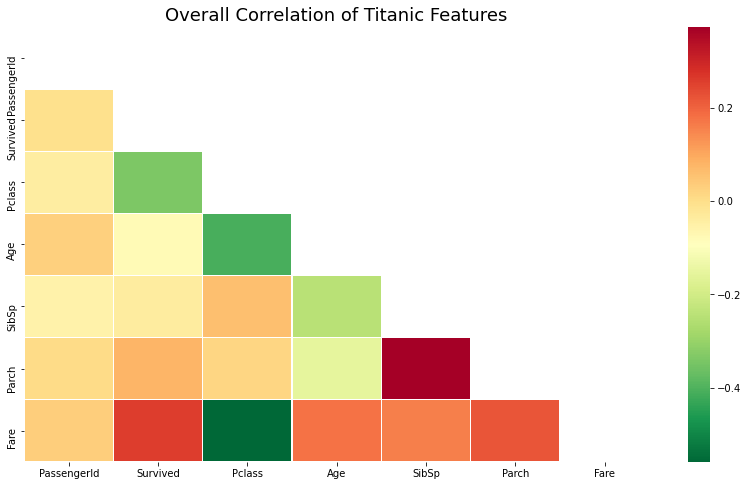

In [53]:
# 그래프 셋업
plt.figure(figsize=(14, 8))

# 그래프 타이틀
plt.title("Overall Correlation of Titanic Features", fontsize=18)

# Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=False, cmap='RdYlGn_r', linewidths=0.2, annot_kws={'size': 20})
plt.show()